GOAL: This log book performs simple histogram segmentation. 

 1. User will select the data folder (tiff files)
 2. Using various profiles through the sample, the user will be able to determine the counts value to use for
 thresholding
 3. Resulting data and histograms will be displayed
 4. User will have the possibility to export the final images
 

# Prepare logbook

import statement necessary to get the logbook up and running

In [1]:
from IPython.html import widgets
from IPython.display import display
from IPython.html.widgets import interact

/Users/j35/anaconda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
import os, os.path

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
from skimage import exposure
import skimage
import numpy as np

In [5]:
from PyQt4 import QtGui

In [6]:
from PIL import Image

In [7]:
%gui qt

## Select the working folder

--> **First you will need to select the sample you want to work with.**

In [8]:
try:
    from PySide import QtCore, QtGui
except ImportError:
    from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a directory
    """
    if dir is None: dir ='./'
    dir_name = QtGui.QFileDialog.getExistingDirectory(None, "Select Folder ...",
                                                  dir,
                                                  QtGui.QFileDialog.ShowDirsOnly)
    return dir_name

In [9]:
%gui qt
data_folder = gui_fname()
%matplotlib inline

In [10]:
list_of_files = [name for name in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, name))]
number_of_files = len(list_of_files)

print('Folder contains %d files.' %number_of_files)

Folder contains 3 files.


In [17]:
image0 = Image.open(os.path.join(data_folder, list_of_files[0]))
image0 = np.asarray(image0)

In [18]:
# define size of images
height, width = image0.shape

print('Images are %d pixels wide and %d pixels height.' %(width, height))

Images are 800 pixels wide and 1550 pixels height.


# Preview slices (x and y cuts)

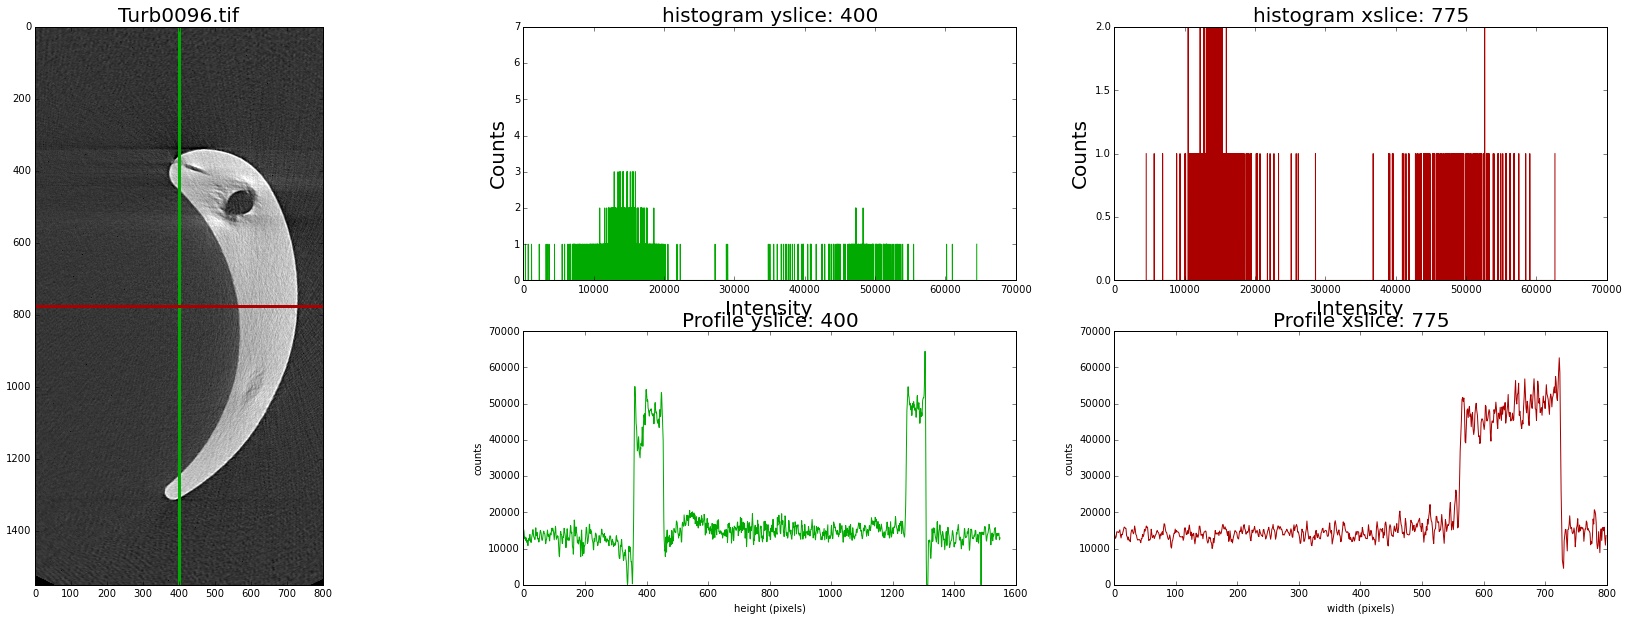

In [21]:
np.set_printoptions(edgeitems=10)

def plot_image(n, xslice, yslice, display_values, remove_max_counts):
    image = Image.open(os.path.join(data_folder, list_of_files[n]))
    image = np.asarray(image)
    image.flags.writeable = True
    if remove_max_counts:
        histo = skimage.exposure.histogram(image, nbins=256)
        index_max_counts = histo[0].argmax(axis=0)
        max_intensity = histo[1][index_max_counts]
        index_to_remove = (image == max_intensity)
        image[index_to_remove] = 0

    fig = plt.figure(figsize=(30,10))
    ax_img = plt.subplot2grid((2,3), (0,0), rowspan=2)
    ax_hist_x = plt.subplot(232)
    ax_hist_y = plt.subplot(233)
    ax_profile_x = plt.subplot(235)
    ax_profile_y = plt.subplot(236)

    #image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[n], fontsize=20)
    ax_img.axvline(xslice, color="#00aa00", linewidth=3)
    ax_img.axhline(yslice, color="#aa0000", linewidth=3)
    
    #xslice
    image_y = image[:, xslice]
    hist_y = skimage.exposure.histogram(image_y, nbins=256)
    ax_hist_x.plot(hist_y[1], hist_y[0], color="#00aa00")
    y_title = "histogram yslice: %d" %xslice
    ax_hist_x.set_title(y_title, fontsize=20)
    ax_hist_x.set_xlabel('Intensity', fontsize=20)
    ax_hist_x.set_ylabel('Counts', fontsize=20)
    
    #yslice
    image_x = image[yslice, :]
    hist_x = skimage.exposure.histogram(image_x, nbins=256)
    ax_hist_y.plot(hist_x[1], hist_x[0], color="#aa0000")
    x_title = "histogram xslice: %d" %yslice
    ax_hist_y.set_title(x_title, fontsize=20)
    ax_hist_y.set_xlabel('Intensity', fontsize=20)
    ax_hist_y.set_ylabel('Counts', fontsize=20)
    
    #xprofile
    y_axis = range(height)
    ax_profile_x.plot(y_axis, image_y, color="#00aa00")
    y_title = "Profile yslice: %d" %xslice
    ax_profile_x.set_title(y_title, fontsize=20)
    ax_profile_x.set_xlabel('height (pixels)')
    ax_profile_x.set_ylabel('counts')

    #yprofile
    x_axis = range(width)
    ax_profile_y.plot(x_axis, image_x, color="#aa0000")
    x_title = "Profile xslice: %d" %yslice
    ax_profile_y.set_title(x_title, fontsize=20)
    ax_profile_y.set_xlabel('width (pixels)')
    ax_profile_y.set_ylabel('counts')
    
    if display_values:
        print("size of image: %d by %d"%image.shape)
        print("Displaying image %s\n" %list_of_files[n])
        print("x_slice %d" %xslice)
        print(image_x)
        print()
        print("y_slice %d" %yslice)
        print(image_y)

interact(plot_image, n=widgets.IntSlider(min=0, max=number_of_files-1, step=1, value=0, description='Index image'), 
         xslice=widgets.IntSlider(min=0, max=width, step=1, value=int(width/2)),
         yslice=widgets.IntSlider(min=0, max=height, step=1, value=int(height/2)),
         display_values = widgets.Checkbox(value = False, description = 'display values'),
         remove_max_counts = widgets.Checkbox(value = True, description = 'remove max counts of image'))

# Preview Slices (compare profiles)

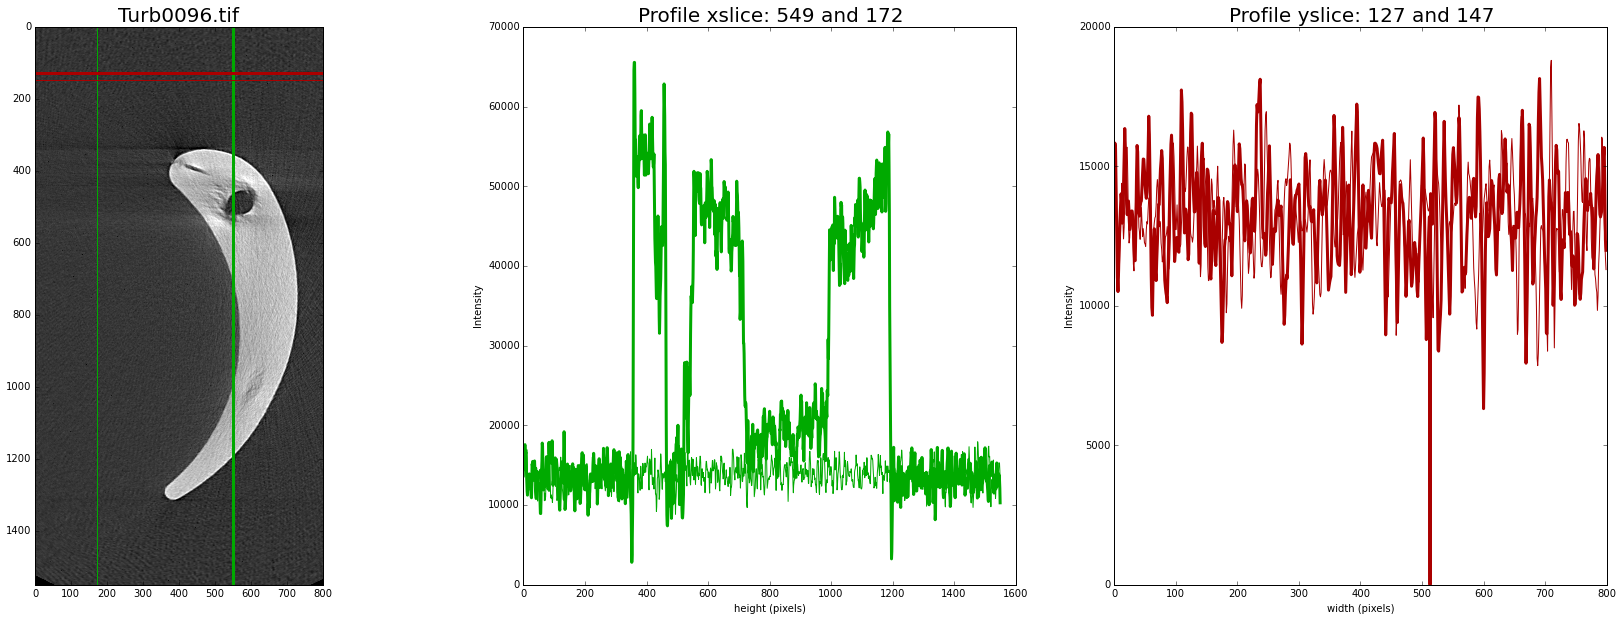

In [22]:
def plot_image(n, xslice1, xslice2, yslice1, yslice2, remove_max_counts):
    image = Image.open(os.path.join(data_folder, list_of_files[n]))
    image = np.asarray(image)
    image.flags.writeable = True
    if remove_max_counts:
        histo = skimage.exposure.histogram(image, nbins=256)
        index_max_counts = histo[0].argmax(axis=0)
        max_intensity = histo[1][index_max_counts]
        index_to_remove = (image == max_intensity)
        image[index_to_remove] = 0

    fig = plt.figure(figsize=(30,10))
    ax_img = plt.subplot(131)
    ax_profile_x = plt.subplot(132)
    ax_profile_y = plt.subplot(133)

    #image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[n], fontsize=20)
    ax_img.axvline(xslice1, color="#00aa00", linewidth=3)
    ax_img.axvline(xslice2, color="#00aa00")
    ax_img.axhline(yslice1, color="#aa0000", linewidth=3)
    ax_img.axhline(yslice2, color="#aa0000")

    # profile_x
    y_axis = range(height)
    image_x1 = image[:, xslice1]
    image_x2 = image[:, xslice2]

    ax_profile_x.plot(y_axis, image_x1, color="#00aa00", linewidth=3)
    ax_profile_x.plot(y_axis, image_x2, color="#00aa00")
    x_title = "Profile xslice: %d and %d" %(xslice1, xslice2)
    ax_profile_x.set_title(x_title, fontsize=20)
    ax_profile_x.set_xlabel('height (pixels)')
    ax_profile_x.set_ylabel('Intensity')

    # profile_y
    x_axis = range(width)
    image_y1 = image[yslice1, :]
    image_y2 = image[yslice2, :]

    ax_profile_y.plot(x_axis, image_y1, color="#aa0000", linewidth=3)
    ax_profile_y.plot(x_axis, image_y2, color="#aa0000")
    y_title = "Profile yslice: %d and %d" %(yslice1, yslice2)
    ax_profile_y.set_title(y_title, fontsize=20)
    ax_profile_y.set_xlabel('width (pixels)')
    ax_profile_y.set_ylabel('Intensity')

interact(plot_image, n = widgets.IntSlider(min=0, max=number_of_files-1, step=1, value=0, description='Index image'), 
         xslice1 = widgets.IntSlider(min=0, max=width, step=1, value=138),
         xslice2 = widgets.IntSlider(min=0, max=width, step=1, value=172),
         yslice1 = widgets.IntSlider(min=0, max=height, step=1, value=127),
         yslice2 = widgets.IntSlider(min=0, max=height, step=1, value=147),
         remove_max_counts = widgets.Checkbox(value = True, description = 'remove max counts of image'))

Analysis: 

Using various threshold, determine the number of counts that you want to isolate. 
    ex: 30,000 counts

We want to keep all the counts that are above 30,000 counts.

In [23]:
max_threshold = 30000

# Removing all the pixels that have an intensity below a given value

In [24]:
max_threshold = str(max_threshold)
threshold_value = widgets.Text(description = 'Threshold value to keep',
                                value = max_threshold)
display(threshold_value)

In [37]:
# calculate the new images
max_intensity = float(threshold_value.value)
image_new_array = []
for _file in list_of_files:
    image_new = Image.open(os.path.join(data_folder, _file))
    image_new = np.asarray(image_new)
    image_new.flags.writeable = True
    index_to_remove = (image_new < max_intensity)
    image_new[index_to_remove] = 0
    
    image_new_array.append(image_new)
    

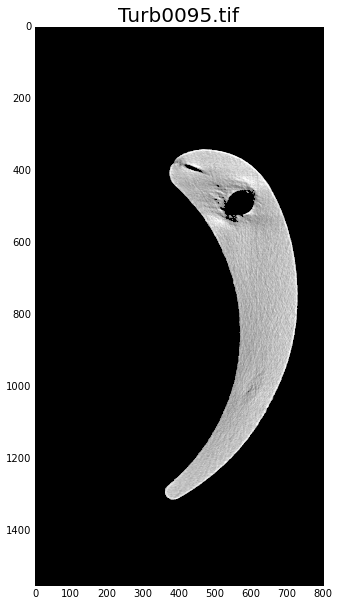

In [42]:
# visualize the new images
def plot_image(n):
    image = image_new_array[n]

    fig = plt.figure(figsize=(30,10))
    ax_img = plt.subplot(111)

    #image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[n], fontsize=20)

interact(plot_image, n=(0, number_of_files-1, 1))

# Export resulting images

In [45]:
# Select output folder
%gui qt
output_folder = gui_fname()
%matplotlib inline

In [46]:
for index, _file in enumerate(list_of_files):
        _image = image_new_array[index]
        _new_image = Image.fromarray(np.int16(_image))
        output_filename = os.path.join(output_folder, _file)
        _new_image.save(output_filename)